<a href="https://colab.research.google.com/github/amit0257/insights-for-impact/blob/main/Capstone_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from google.colab import drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#importing the data
df=pd.read_excel('/content/drive/My Drive/DLCP/cricket_data.xlsx')

Lets check the data

In [ ]:
df.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,Summer,9940.0,No,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,Summer,8400.0,No,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,NaN,13146.0,Yes,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,Summer,7357.0,No,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,Summer,13328.0,No,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [ ]:
df.tail()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
2925,Game_2926,Win,30.0,Day,T20,3.0,1,4.0,Batting,South Africa,Summer,33950.0,No,15.0,3,8.0,0,3.0,6.0,3,50.0,3,2
2926,Game_2927,Win,30.0,Day,ODI,4.0,1,3.0,Bowling,Kenya,Summer,19663.0,No,14.0,4,8.0,2,3.0,6.0,2,52.0,2,1
2927,Game_2928,Win,30.0,Day and Night,ODI,4.0,1,3.0,Bowling,Pakistan,Rainy,39823.0,Yes,14.0,4,10.0,2,4.0,10.0,2,80.0,3,2
2928,Game_2929,Win,30.0,Day,ODI,4.0,1,3.0,Batting,Kenya,Rainy,14007.0,No,14.0,2,20.0,2,3.0,6.0,3,98.0,3,1
2929,Game_2930,Win,30.0,Day,ODI,4.0,1,3.0,Batting,Kenya,Rainy,20839.0,No,12.0,4,4.0,5,3.0,6.0,3,62.0,1,1


In [ ]:
# shape of the data
df.shape

(2930, 23)

In [ ]:
# lets check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [ ]:
#lets divide the data into categorical and numerical
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Game_number', 'Result', 'Match_light_type', 'Match_format', 'First_selection', 'Opponent', 'Season', 'Offshore', 'Players_scored_zero', 'player_highest_wicket']
['Avg_team_Age', 'Bowlers_in_team', 'Wicket_keeper_in_team', 'All_rounder_in_team', 'Audience_number', 'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent', 'player_highest_run']


In [ ]:
df[cat].describe().T

,count,unique,top,freq
Game_number,2930,2930,Game_2304,1
Result,2930,2,Win,2457
Match_light_type,2878,3,Day,2041
Match_format,2860,4,ODI,1865
First_selection,2871,3,Bowling,1722
Opponent,2894,9,South Africa,640
Season,2868,3,Rainy,1309
Offshore,2866,2,No,2057
Players_scored_zero,2930,5,3,1730
player_highest_wicket,2930,6,1,1084


Inference :
### India won 84% of the matches they played
### 70% of the matches India Played are in Day Light
### 63% of the Matches India paid are ODI's
### 59 % of the time atleast 3 people scored zero in match

In [ ]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2833.0,29.242852,2.264230,12.0,30.0,30.0,30.00,70.0
Bowlers_in_team,2848.0,2.913624,1.023907,1.0,2.0,3.0,4.00,5.0
Wicket_keeper_in_team,2930.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
All_rounder_in_team,2890.0,2.722491,1.092699,1.0,2.0,3.0,4.00,4.0
Audience_number,2849.0,46267.960688,48599.581459,7063.0,20363.0,34349.0,57876.00,1399930.0
Max_run_scored_1over,2902.0,15.199862,3.661010,11.0,12.0,14.0,18.00,25.0
Max_wicket_taken_1over,2930.0,2.713993,1.080623,1.0,2.0,3.0,4.00,4.0
Extra_bowls_bowled,2901.0,11.252671,7.780829,0.0,6.0,10.0,15.00,40.0
Min_run_given_1over,2930.0,1.952560,1.678332,0.0,0.0,2.0,3.00,6.0
Min_run_scored_1over,2903.0,2.762659,0.705759,1.0,2.0,3.0,3.00,4.0


In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

GAME_NUMBER :  2930
Game_2304    1
Game_2824    1
Game_721     1
Game_363     1
Game_584     1
            ..
Game_1230    1
Game_2679    1
Game_1522    1
Game_1281    1
Game_2359    1
Name: Game_number, Length: 2930, dtype: int64


RESULT :  2
Loss     473
Win     2457
Name: Result, dtype: int64


MATCH_LIGHT_TYPE :  3
Night             296
Day and Night     541
Day              2041
Name: Match_light_type, dtype: int64


MATCH_FORMAT :  4
20-20       6
Test      125
T20       864
ODI      1865
Name: Match_format, dtype: int64


FIRST_SELECTION :  3
Bat          11
Batting    1138
Bowling    1722
Name: First_selection, dtype: int64


OPPONENT :  9
Australia       104
West Indies     158
Zimbabwe        163
Bangladesh      204
Pakistan        253
England         283
Srilanka        513
Kenya           576
South Africa    640
Name: Opponent, dtype: int64


SEASON :  3
Winter     641
Summer     918
Rainy     1309
Name: Season, dtype: int64


OFFSHORE :  2
Yes     809
No     2057
Name: Of

In [ ]:
#lets understand pecentage wins over oppenents
grouped= df['Opponent'].groupby(df['Result']).value_counts()


In [ ]:
grouped / grouped.groupby(level = 1).sum()*100

Result  Opponent    
Loss    Srilanka        24.171540
        South Africa    17.031250
        Kenya           16.145833
        Zimbabwe        40.490798
        Australia       23.076923
        England          6.360424
        Pakistan         6.719368
        Bangladesh       4.901961
        West Indies      2.531646
Win     South Africa    82.968750
        Kenya           83.854167
        Srilanka        75.828460
        England         93.639576
        Pakistan        93.280632
        Bangladesh      95.098039
        West Indies     97.468354
        Zimbabwe        59.509202
        Australia       76.923077
Name: Opponent, dtype: float64

In [ ]:
## Are there any duplicate records

# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket


In [ ]:
df.isnull().sum()

Game_number                0
Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [ ]:
# lets impute missing values in categorical data

In [ ]:
for column in ['Match_light_type', 'Match_format', 'First_selection', 'Opponent', 'Season', 'Offshore']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
cat1=["Match_light_type", "Match_format", "First_selection", "Opponent", "Season", "Offshore"]

In [ ]:
for i in cat1:
    df[i]=df[i].astype("object")

In [ ]:
# lets impute missing values in numerical data
num1=['Avg_team_Age', 'Bowlers_in_team', 'Wicket_keeper_in_team', 'All_rounder_in_team', 'Audience_number', 'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent', 'player_highest_run']

In [ ]:
for i in num1:
    df[i].fillna(df[i].median(),inplace=True)


In [ ]:
df.isnull().sum()

Game_number               0
Result                    0
Avg_team_Age              0
Match_light_type          0
Match_format              0
Bowlers_in_team           0
Wicket_keeper_in_team     0
All_rounder_in_team       0
First_selection           0
Opponent                  0
Season                    0
Audience_number           0
Offshore                  0
Max_run_scored_1over      0
Max_wicket_taken_1over    0
Extra_bowls_bowled        0
Min_run_given_1over       0
Min_run_scored_1over      0
Max_run_given_1over       0
extra_bowls_opponent      0
player_highest_run        0
Players_scored_zero       0
player_highest_wicket     0
dtype: int64

### All null values have been appropriately imputed

In [ ]:
print(num)

['Avg_team_Age', 'Bowlers_in_team', 'Wicket_keeper_in_team', 'All_rounder_in_team', 'Audience_number', 'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent', 'player_highest_run']


# Univarite Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed i

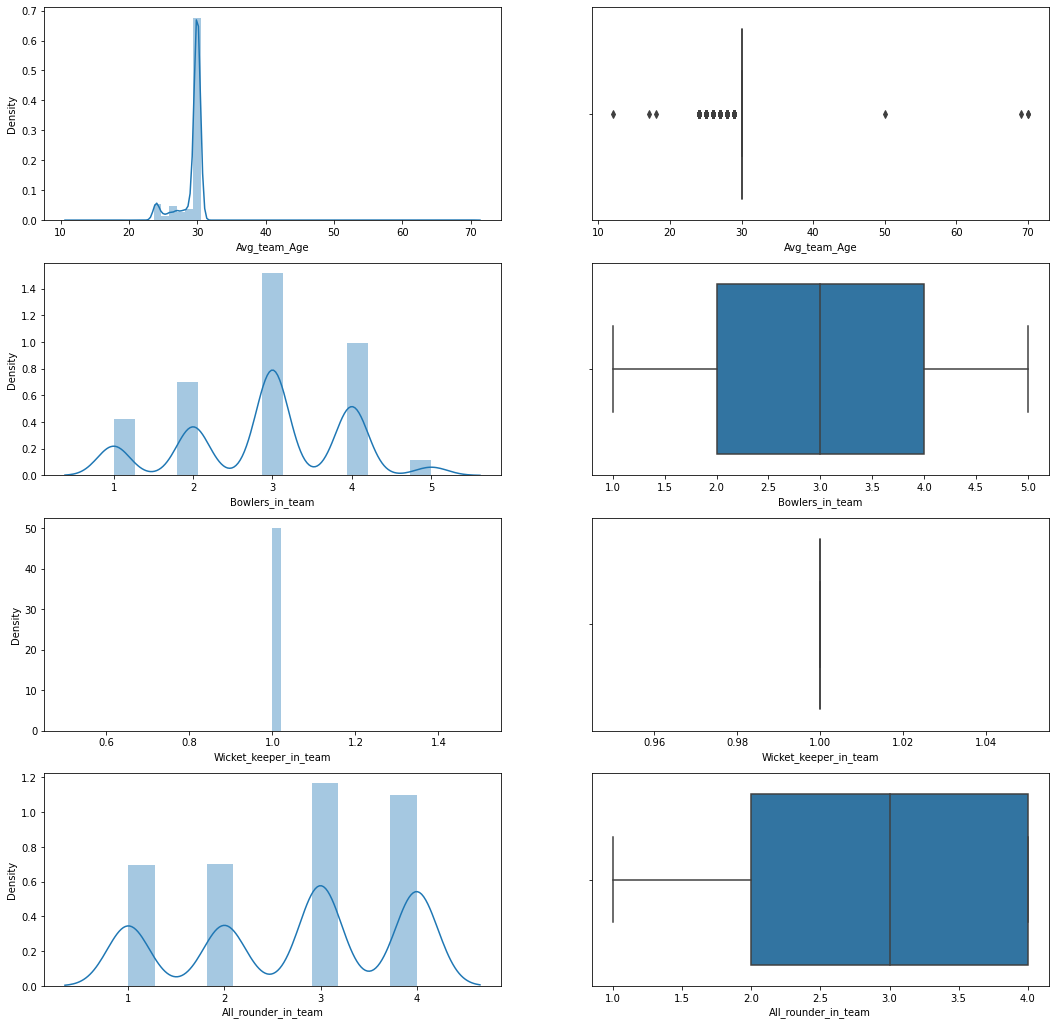

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(18,18)
a = sns.distplot(df['Avg_team_Age'] , ax=axes[0][0])
a = sns.boxplot(df['Avg_team_Age'] , orient = "v" , ax=axes[0][1])


a = sns.distplot(df['Bowlers_in_team'] , ax=axes[1][0])
a = sns.boxplot(df['Bowlers_in_team'] , orient = "v" , ax=axes[1][1])



a = sns.distplot(df['Wicket_keeper_in_team'] , ax=axes[2][0])
a = sns.boxplot(df['Wicket_keeper_in_team'] , orient = "v" , ax=axes[2][1])



a = sns.distplot(df['All_rounder_in_team'] , ax=axes[3][0])
a = sns.boxplot(df['All_rounder_in_team'] , orient = "v" , ax=axes[3][1])


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed i

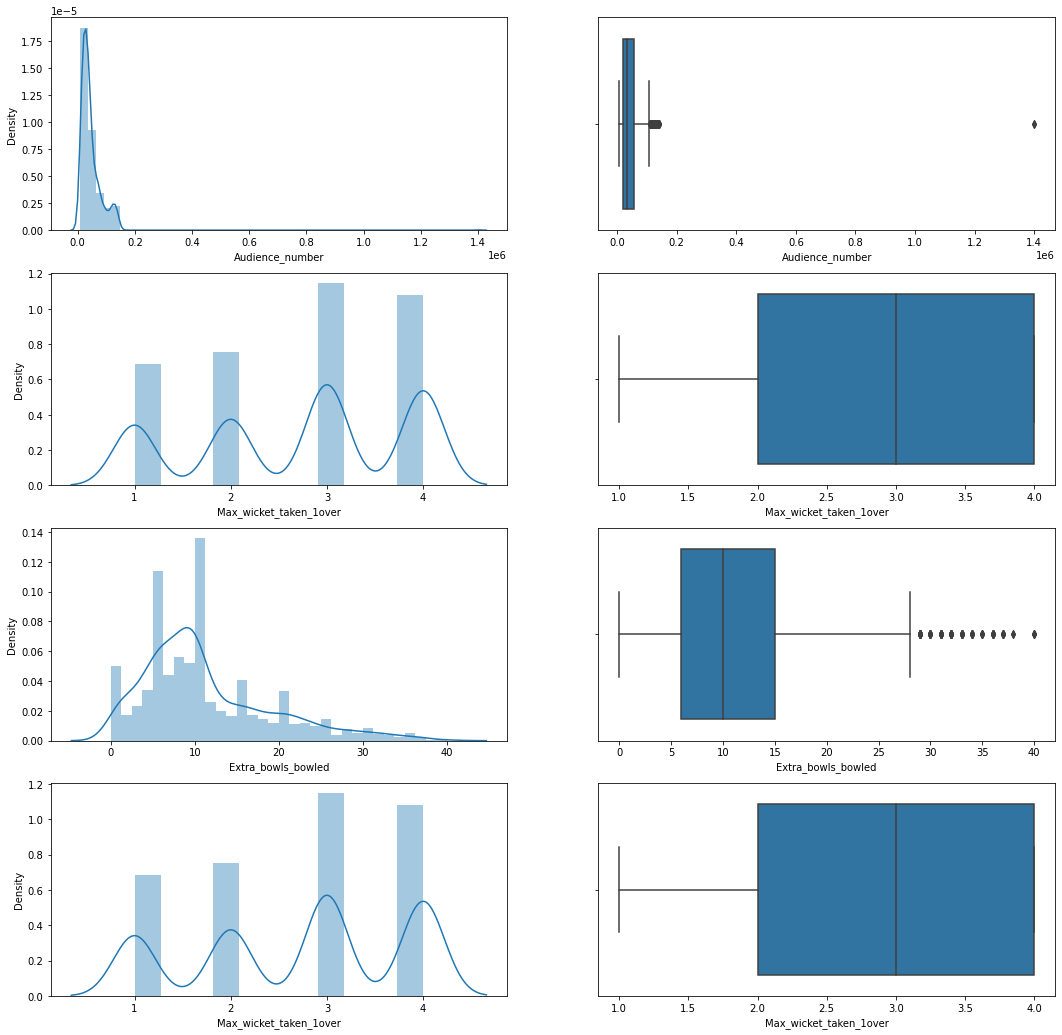

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(18,18)
a = sns.distplot(df['Audience_number'] , ax=axes[0][0])
a = sns.boxplot(df['Audience_number'] , orient = "v" , ax=axes[0][1])


a = sns.distplot(df['Max_wicket_taken_1over'] , ax=axes[1][0])
a = sns.boxplot(df['Max_wicket_taken_1over'] , orient = "v" , ax=axes[1][1])



a = sns.distplot(df['Extra_bowls_bowled'] , ax=axes[2][0])
a = sns.boxplot(df['Extra_bowls_bowled'] , orient = "v" , ax=axes[2][1])



a = sns.distplot(df['Max_wicket_taken_1over'] , ax=axes[3][0])
a = sns.boxplot(df['Max_wicket_taken_1over'] , orient = "v" , ax=axes[3][1])


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed i

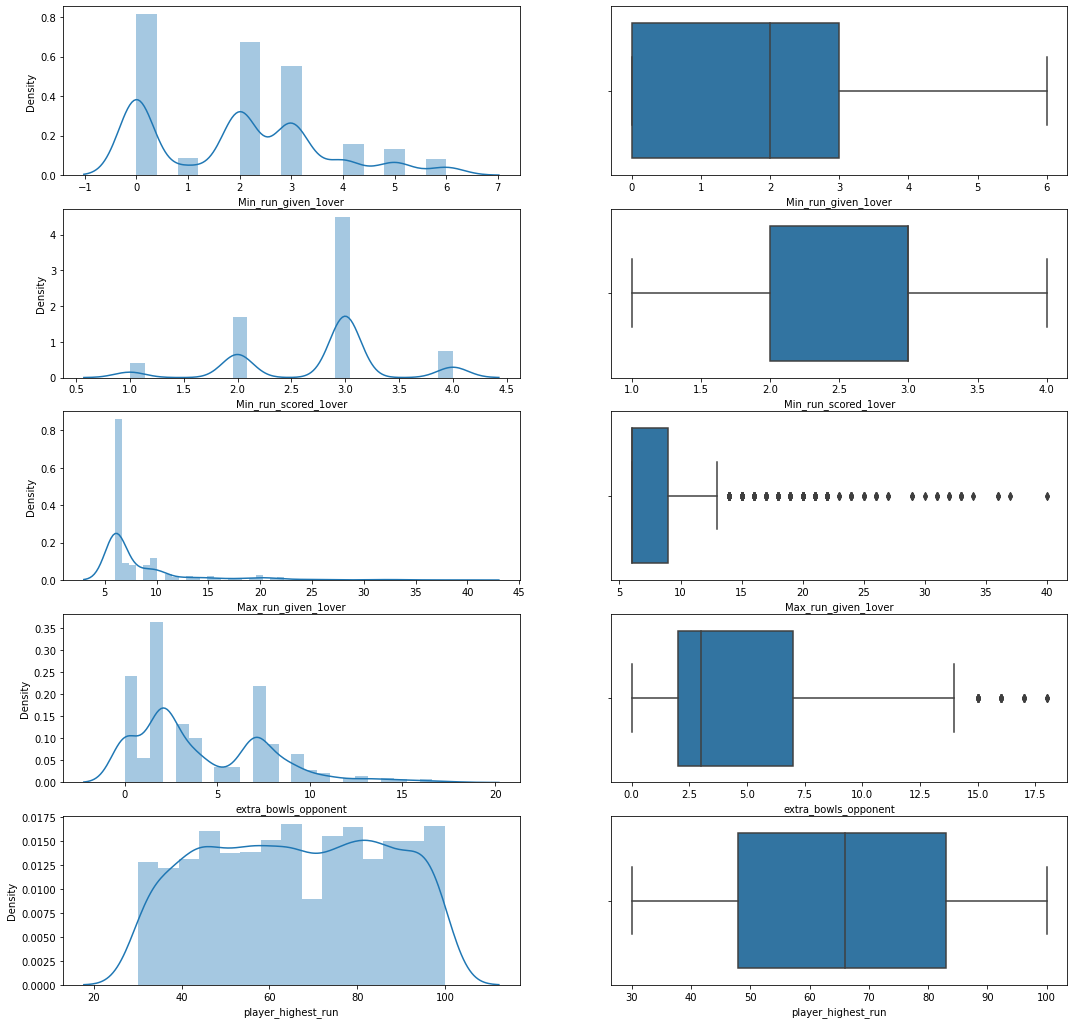

In [ ]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(18,18)
a = sns.distplot(df['Min_run_given_1over'] , ax=axes[0][0])
a = sns.boxplot(df['Min_run_given_1over'] , orient = "v" , ax=axes[0][1])


a = sns.distplot(df['Min_run_scored_1over'] , ax=axes[1][0])
a = sns.boxplot(df['Min_run_scored_1over'] , orient = "v" , ax=axes[1][1])



a = sns.distplot(df['Max_run_given_1over'] , ax=axes[2][0])
a = sns.boxplot(df['Max_run_given_1over'] , orient = "v" , ax=axes[2][1])



a = sns.distplot(df['extra_bowls_opponent'] , ax=axes[3][0])
a = sns.boxplot(df['extra_bowls_opponent'] , orient = "v" , ax=axes[3][1])


a = sns.distplot(df['player_highest_run'] , ax=axes[4][0])
a = sns.boxplot(df['player_highest_run'] , orient = "v" , ax=axes[4][1])

plt.show()

# Bivariate Analysis

In [ ]:
print(cat)

['Game_number', 'Result', 'Match_light_type', 'Match_format', 'First_selection', 'Opponent', 'Season', 'Offshore', 'Players_scored_zero', 'player_highest_wicket']


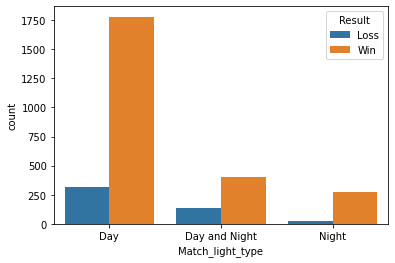

In [ ]:
sns.countplot(x="Match_light_type", hue="Result", data=df)

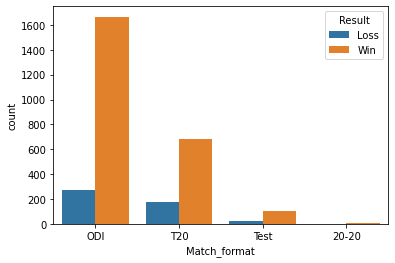

In [ ]:
sns.countplot(x="Match_format", hue="Result", data=df)

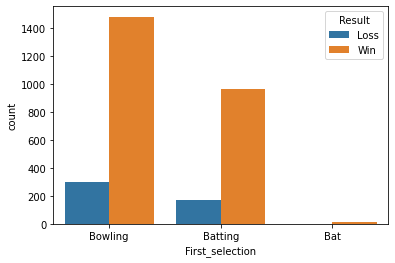

In [ ]:
sns.countplot(x="First_selection", hue="Result", data=df)


In [ ]:
sns.set(rc={"figure.figsize":(10, 10)})

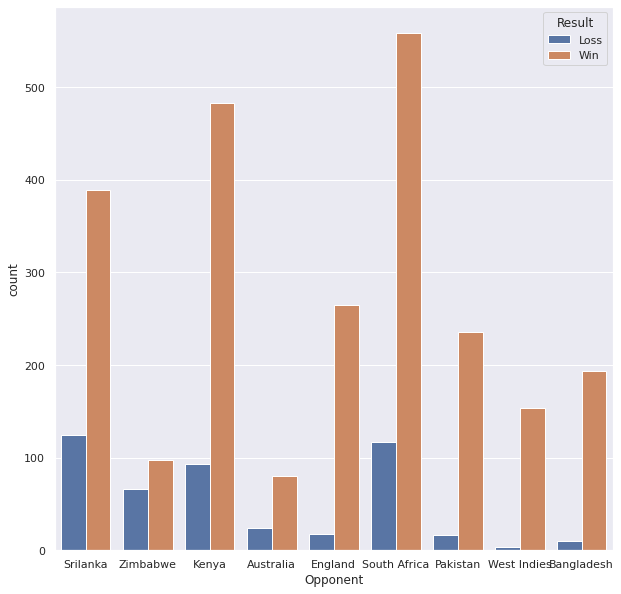

In [ ]:
sns.countplot(x="Opponent", hue="Result", data=df)

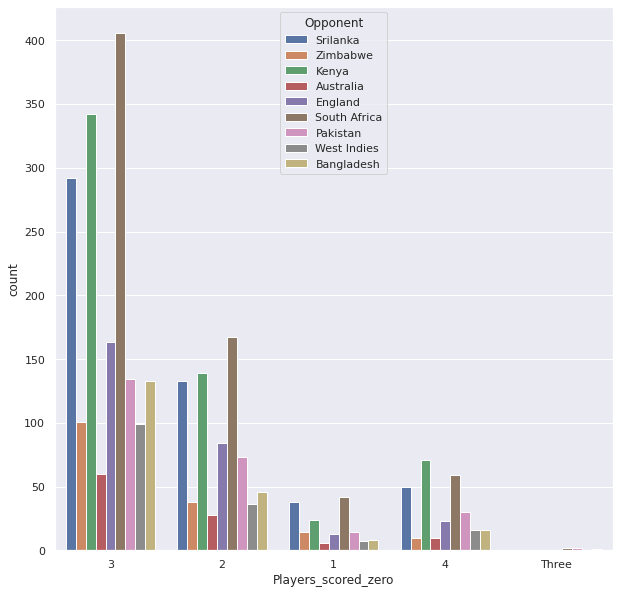

In [ ]:
sns.countplot(x="Players_scored_zero", hue="Opponent", data=df)

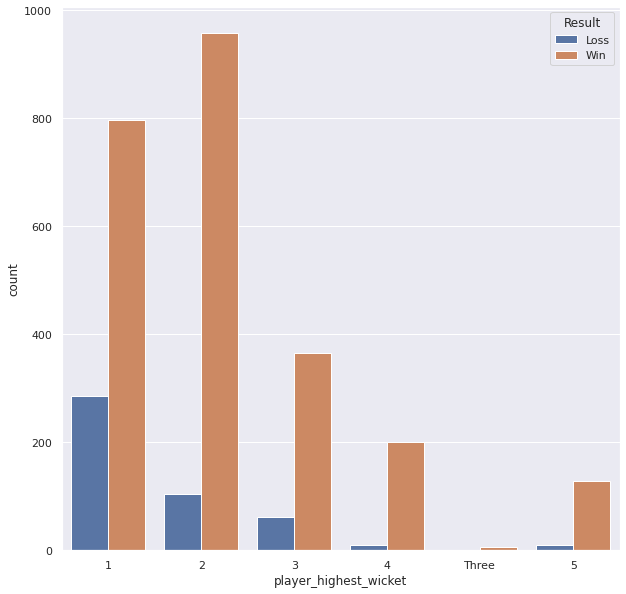

In [ ]:
sns.countplot(x="player_highest_wicket", hue="Result", data=df)

Line plot

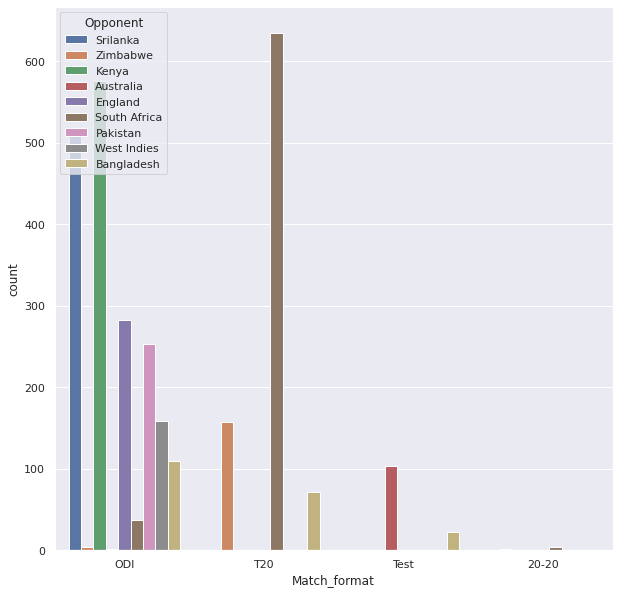

In [ ]:
sns.countplot(x="Match_format", hue="Opponent", data=df)

In [ ]:
df.Players_scored_zero[df.Players_scored_zero == 'Three'] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.player_highest_wicket[df.player_highest_wicket == 'Three'] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.replace(to_replace ="20-20",
                 value ="T20")

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,Summer,9940.0,No,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,Summer,8400.0,No,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,Rainy,13146.0,Yes,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,Day,ODI,2.0,1,2.0,Bowling,Kenya,Summer,7357.0,No,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,Summer,13328.0,No,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Game_2926,Win,30.0,Day,T20,3.0,1,4.0,Batting,South Africa,Summer,33950.0,No,15.0,3,8.0,0,3.0,6.0,3,50.0,3,2
2926,Game_2927,Win,30.0,Day,ODI,4.0,1,3.0,Bowling,Kenya,Summer,19663.0,No,14.0,4,8.0,2,3.0,6.0,2,52.0,2,1
2927,Game_2928,Win,30.0,Day and Night,ODI,4.0,1,3.0,Bowling,Pakistan,Rainy,39823.0,Yes,14.0,4,10.0,2,4.0,10.0,2,80.0,3,2
2928,Game_2929,Win,30.0,Day,ODI,4.0,1,3.0,Batting,Kenya,Rainy,14007.0,No,14.0,2,20.0,2,3.0,6.0,3,98.0,3,1


In [ ]:
df=df.replace(to_replace ="Bat",
                 value ="Batting")

In [ ]:
#sns.pairplot(df ,diag_kind='kde' ,hue='Result');

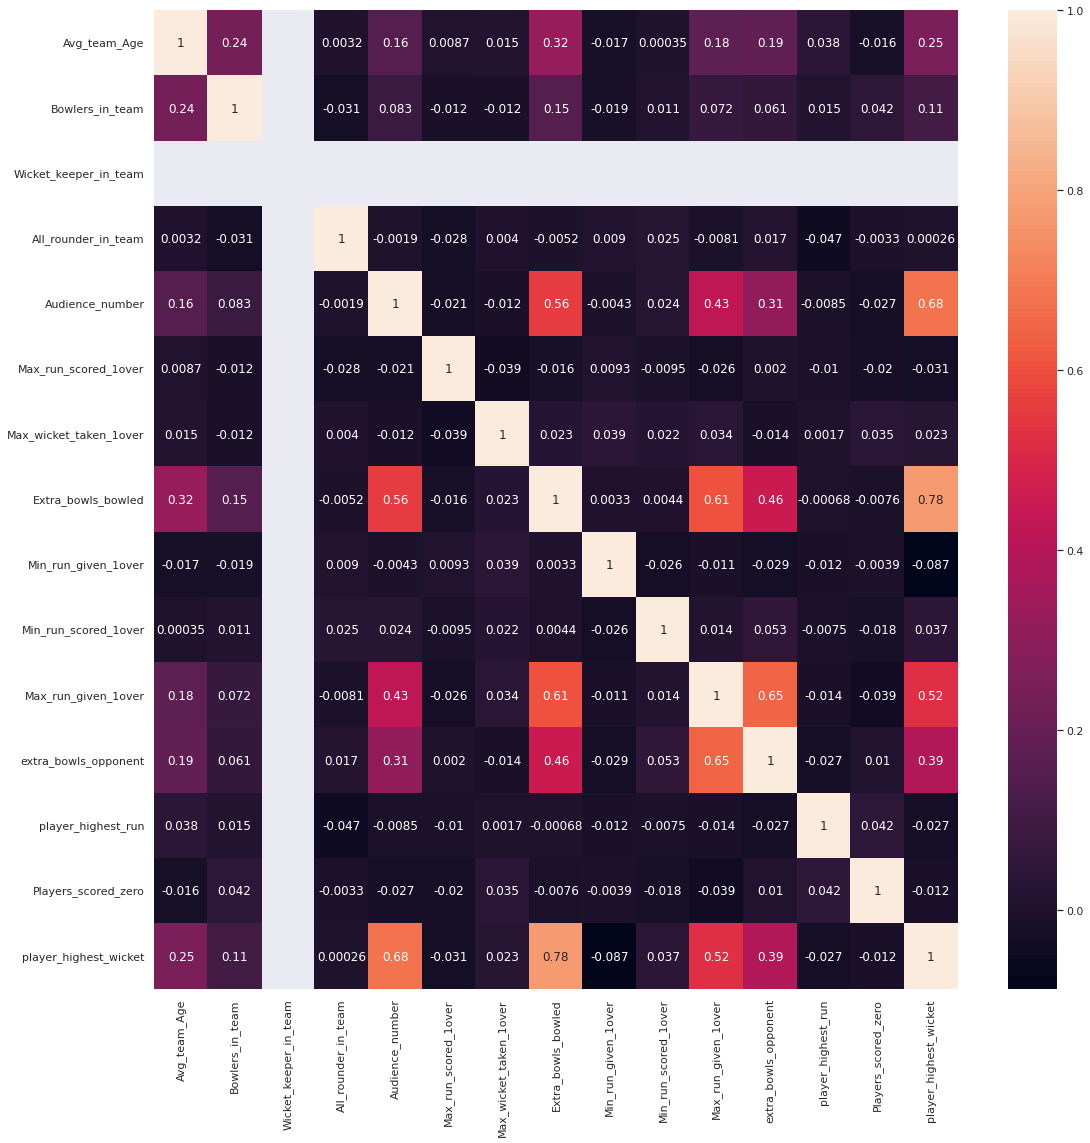

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)
plt.show()

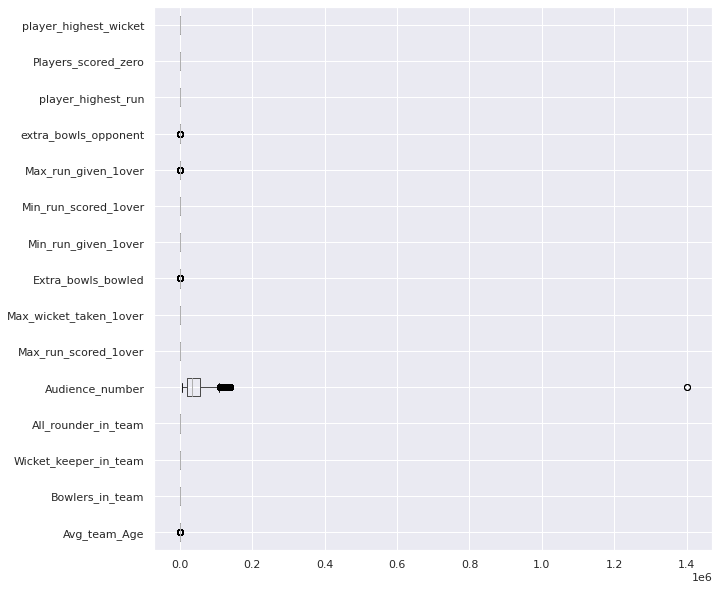

In [ ]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

In [ ]:
#treating outliers
def remove_outlier(num):
    sorted(num)
    Q1,Q3=np.percentile(num,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df[num].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

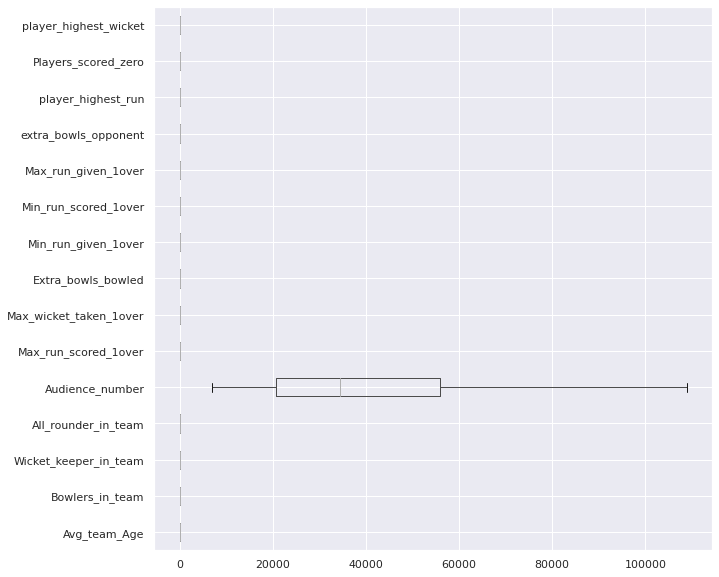

In [ ]:

plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

In [ ]:
df.Result[df.Result == 'Win'] = 0
df.Result[df.Result == 'Loss'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df=df.drop('Game_number',axis=1)

In [ ]:
cat2 = ['Match_light_type', 'Match_format', 'First_selection', 'Opponent', 'Season', 'Offshore', 'Players_scored_zero', 'player_highest_wicket']

In [ ]:
df1 =pd.get_dummies(df, columns=cat2,drop_first=True)

In [ ]:
df1.head()

,Result,Avg_team_Age,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Match_light_type_Day and Night,Match_light_type_Night,Match_format_ODI,Match_format_T20,Match_format_Test,First_selection_Bowling,Opponent_Bangladesh,Opponent_England,Opponent_Kenya,Opponent_Pakistan,Opponent_South Africa,Opponent_Srilanka,Opponent_West Indies,Opponent_Zimbabwe,Season_Summer,Season_Winter,Offshore_Yes,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5
0,1,30.0,3.0,1.0,3.0,9940.0,13.0,3.0,0.0,2.0,3.0,6.0,0.0,54.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1,0,30.0,3.0,1.0,4.0,8400.0,12.0,1.0,0.0,0.0,3.0,6.0,0.0,69.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
2,1,30.0,3.0,1.0,2.0,13146.0,14.0,4.0,0.0,0.0,3.0,6.0,0.0,69.0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
3,0,30.0,2.0,1.0,2.0,7357.0,15.0,4.0,0.0,2.0,3.0,6.0,0.0,73.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,1,30.0,1.0,1.0,3.0,13328.0,12.0,4.0,0.0,0.0,3.0,6.0,0.0,80.0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X=df1.drop('Result',axis=1)
y=df1['Result']

In [ ]:
y=y.astype('int')

In [ ]:
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2051, 37)
Number transactions y_train dataset:  (2051,)
Number transactions X_test dataset:  (879, 37)
Number transactions y_test dataset:  (879,)


In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [ ]:
counter=Counter(y)
counter

Counter({0: 2457, 1: 473})

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
counter=Counter(y)
counter

Counter({0: 2457, 1: 2457})

# Lets apply Machine Learning modules to see the preidction


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn import metrics

In [ ]:
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train,y_train)
model1

LinearDiscriminantAnalysis()

In [ ]:

y_train_predict=model1.predict(X_train)
model_score=model1.score(X_train, y_train)
print(model_score)
print('  ')
print(metrics.confusion_matrix(y_train,y_train_predict))
print('  ')

print(metrics.classification_report(y_train,y_train_predict))

0.8771331058020477
  
[[1665   58]
 [ 194  134]]
  
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1723
           1       0.70      0.41      0.52       328

    accuracy                           0.88      2051
   macro avg       0.80      0.69      0.72      2051
weighted avg       0.86      0.88      0.86      2051



In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

the auc 0.854 


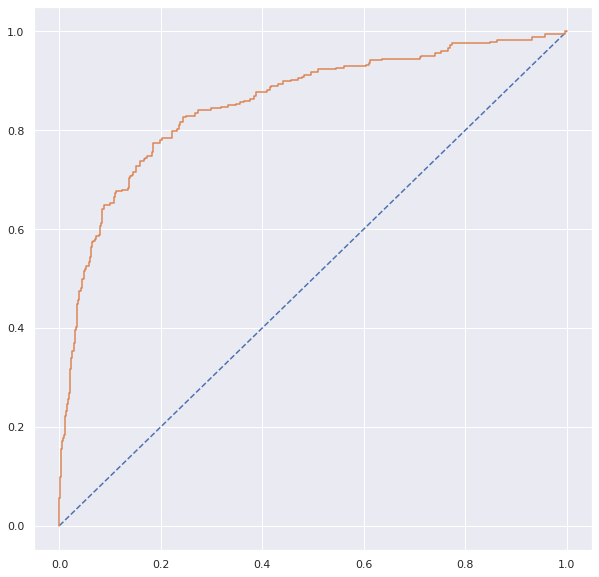

In [ ]:
probs_train=model1.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.01905
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.38883
Feature: 4, Score: -0.00001
Feature: 5, Score: -0.01741
Feature: 6, Score: -0.20727
Feature: 7, Score: -0.06310
Feature: 8, Score: -0.16408
Feature: 9, Score: -0.28837
Feature: 10, Score: 0.11631
Feature: 11, Score: -0.10678
Feature: 12, Score: 0.00101
Feature: 13, Score: 0.99675
Feature: 14, Score: -0.53000
Feature: 15, Score: 0.65284
Feature: 16, Score: 0.54057
Feature: 17, Score: 0.18307
Feature: 18, Score: 0.17734
Feature: 19, Score: -1.27285
Feature: 20, Score: -0.95332
Feature: 21, Score: -1.55022
Feature: 22, Score: -0.97092
Feature: 23, Score: -0.63201
Feature: 24, Score: -0.56510
Feature: 25, Score: -1.52473
Feature: 26, Score: -0.04490
Feature: 27, Score: 1.15486
Feature: 28, Score: -0.29522
Feature: 29, Score: 2.14311
Feature: 30, Score: -1.51640
Feature: 31, Score: -1.77763
Feature: 32, Score: -2.23453
Feature: 33, Score: -1.19979
Feature: 34, Score: -0.03082
Feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


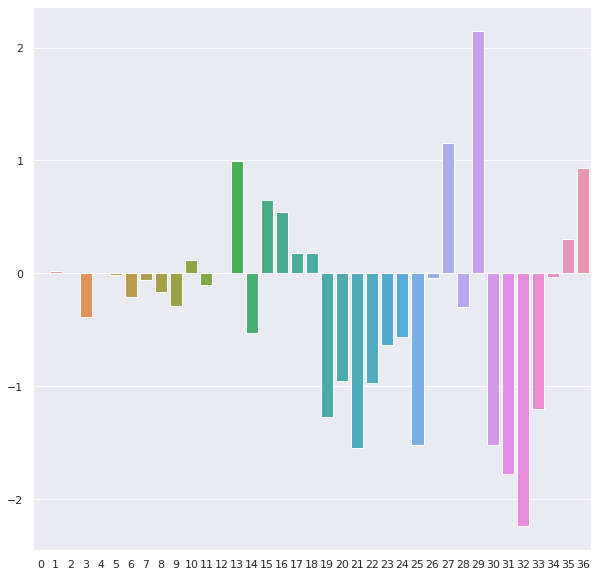

In [ ]:
importance = model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
sns.barplot([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Avg_team_Age                    4914 non-null   float64
 1   Bowlers_in_team                 4914 non-null   float64
 2   Wicket_keeper_in_team           4914 non-null   float64
 3   All_rounder_in_team             4914 non-null   float64
 4   Audience_number                 4914 non-null   float64
 5   Max_run_scored_1over            4914 non-null   float64
 6   Max_wicket_taken_1over          4914 non-null   float64
 7   Extra_bowls_bowled              4914 non-null   float64
 8   Min_run_given_1over             4914 non-null   float64
 9   Min_run_scored_1over            4914 non-null   float64
 10  Max_run_given_1over             4914 non-null   float64
 11  extra_bowls_opponent            4914 non-null   float64
 12  player_highest_run              49

In [ ]:
y_test_predict=model1.predict(X_test)
model_score=model1.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.8577929465301479
[[702  32]
 [ 93  52]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       734
           1       0.62      0.36      0.45       145

    accuracy                           0.86       879
   macro avg       0.75      0.66      0.69       879
weighted avg       0.84      0.86      0.84       879



the auc curve 0.791 


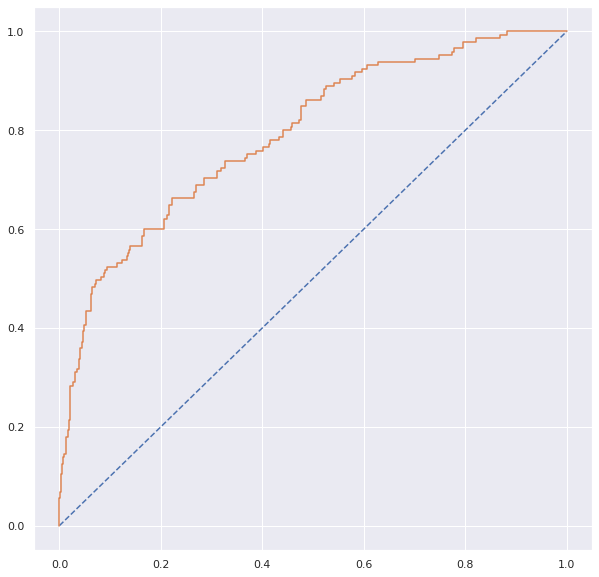

In [ ]:
probs_test=model1.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB=GaussianNB()
model2=NB.fit(X_train, y_train)

In [ ]:
y_train_predict=model2.predict(X_train)
model_score=model2.score(X_train, y_train)
print(model_score)
print('  ')
print(metrics.confusion_matrix(y_train,y_train_predict))
print('  ')

print(metrics.classification_report(y_train,y_train_predict))

0.8313018039980498
  
[[1565  158]
 [ 188  140]]
  
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1723
           1       0.47      0.43      0.45       328

    accuracy                           0.83      2051
   macro avg       0.68      0.67      0.67      2051
weighted avg       0.83      0.83      0.83      2051



the auc 0.747 


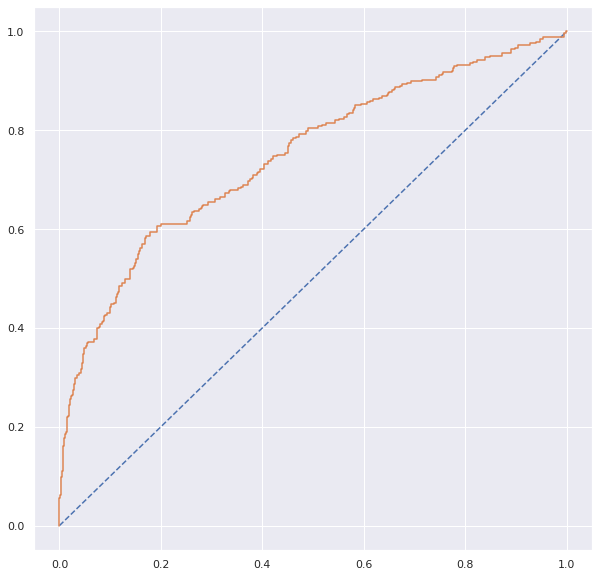

In [ ]:
probs_train=model2.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [ ]:
y_test_predict=model2.predict(X_test)
model_score=model2.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.8213879408418657
[[669  65]
 [ 92  53]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       734
           1       0.45      0.37      0.40       145

    accuracy                           0.82       879
   macro avg       0.66      0.64      0.65       879
weighted avg       0.81      0.82      0.81       879



the auc curve 0.694 


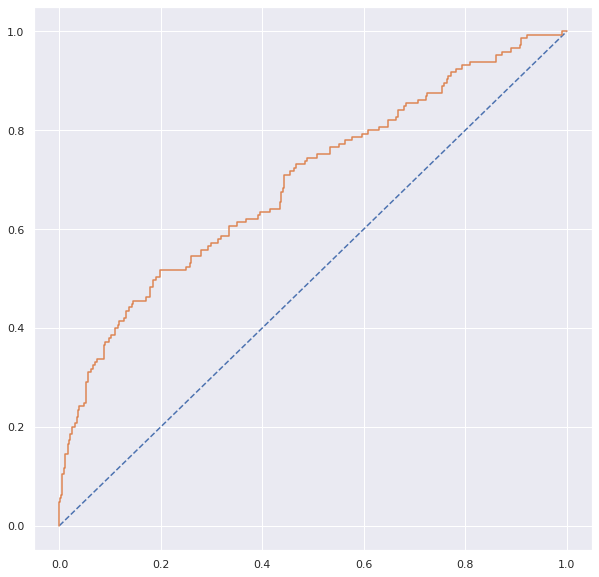

In [ ]:
probs_test=model2.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
model3=KNN_model.fit(X_train,y_train)

In [ ]:
y_train_predict=model3.predict(X_train)
model_score=model3.score(X_train, y_train)
print(model_score)
print('  ')
print(metrics.confusion_matrix(y_train,y_train_predict))
print('  ')

print(metrics.classification_report(y_train,y_train_predict))

0.8654314968308142
  
[[1679   44]
 [ 232   96]]
  
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1723
           1       0.69      0.29      0.41       328

    accuracy                           0.87      2051
   macro avg       0.78      0.63      0.67      2051
weighted avg       0.85      0.87      0.84      2051



the auc 0.907 


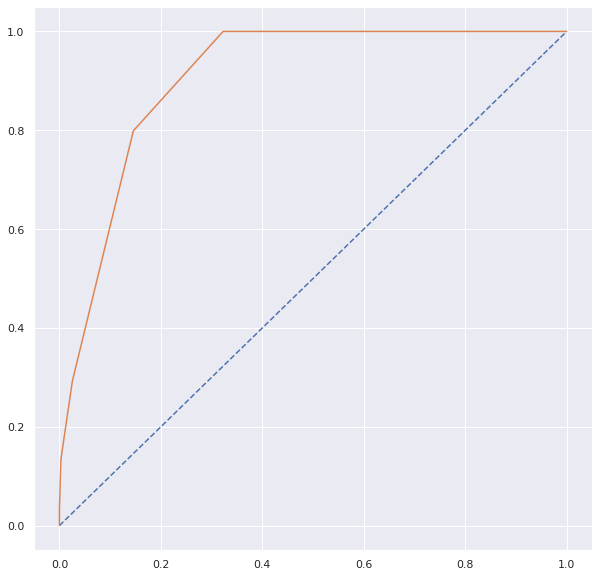

In [ ]:
probs_train=model3.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [ ]:
y_test_predict=model3.predict(X_test)
model_score=model3.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.8316268486916951
[[707  27]
 [121  24]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.91       734
           1       0.47      0.17      0.24       145

    accuracy                           0.83       879
   macro avg       0.66      0.56      0.58       879
weighted avg       0.79      0.83      0.80       879



the auc curve 0.740 


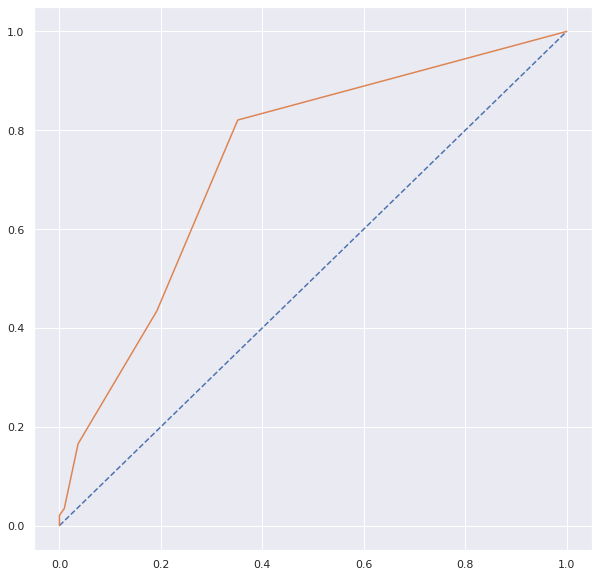

In [ ]:
probs_test=model3.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

# Decision Tree


In [ ]:
from sklearn import tree

In [ ]:
DT_model=tree.DecisionTreeClassifier(max_depth=8, random_state=42)
model4=DT_model.fit(X_train,y_train)

In [ ]:
y_train_predict=model4.predict(X_train)
model_score=model4.score(X_train, y_train)
print(model_score)
print('  ')
print(metrics.confusion_matrix(y_train,y_train_predict))
print('  ')

print(metrics.classification_report(y_train,y_train_predict))

0.9332033154558752
  
[[1702   21]
 [ 116  212]]
  
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1723
           1       0.91      0.65      0.76       328

    accuracy                           0.93      2051
   macro avg       0.92      0.82      0.86      2051
weighted avg       0.93      0.93      0.93      2051



the auc 0.944 


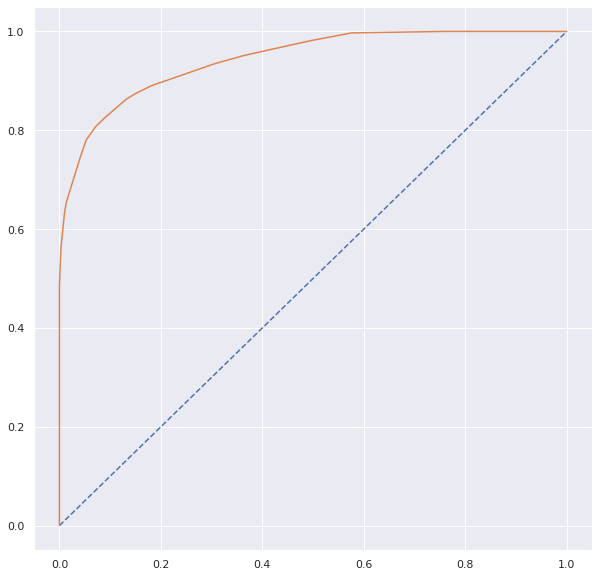

In [ ]:
probs_train=model4.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [ ]:
y_test_predict=model4.predict(X_test)
model_score=model4.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.8794084186575654
[[706  28]
 [ 78  67]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       734
           1       0.71      0.46      0.56       145

    accuracy                           0.88       879
   macro avg       0.80      0.71      0.74       879
weighted avg       0.87      0.88      0.87       879



the auc curve 0.781 


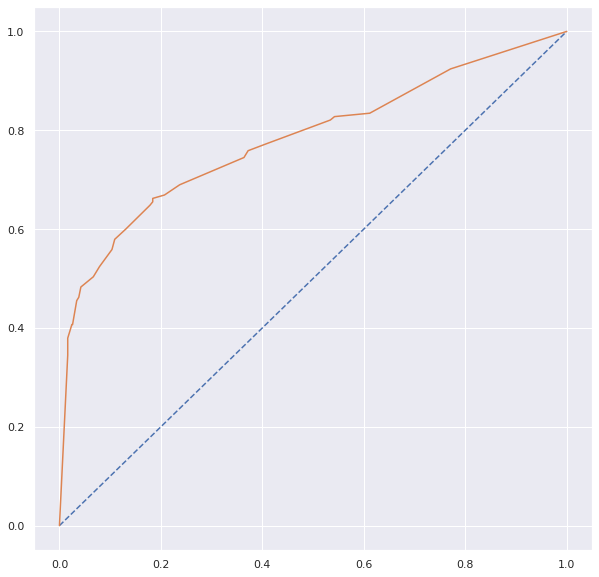

In [ ]:
probs_test=model4.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.01228
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.02861
Feature: 4, Score: 0.14397
Feature: 5, Score: 0.06983
Feature: 6, Score: 0.01930
Feature: 7, Score: 0.09368
Feature: 8, Score: 0.03806
Feature: 9, Score: 0.07301
Feature: 10, Score: 0.02661
Feature: 11, Score: 0.04482
Feature: 12, Score: 0.11625
Feature: 13, Score: 0.01343
Feature: 14, Score: 0.00568
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.01495
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.02368
Feature: 21, Score: 0.01786
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.01179
Feature: 24, Score: 0.00493
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.03030
Feature: 27, Score: 0.07457
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.10175
Feature: 30, Score: 0.01589
Feature: 31, Score: 0.00516
Feature: 32, Score: 0.00979
Feature: 33, Score: 0.00379
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


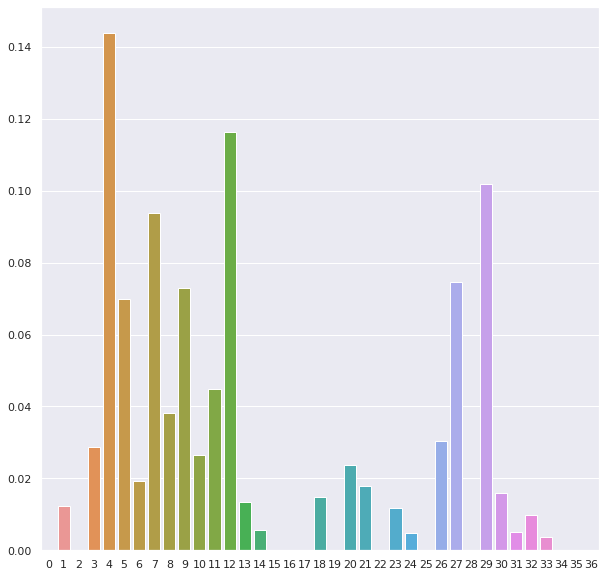

In [ ]:
importance = model4.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
sns.barplot([x for x in range(len(importance))], importance)
plt.show()

# Ensemble Methods

## Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_model=RandomForestClassifier()
model5=rf_model.fit(X_train,y_train)

In [ ]:
y_train_predict=model5.predict(X_train)
model_score=model5.score(X_train, y_train)
print(model_score)
print('  ')
print(metrics.confusion_matrix(y_train,y_train_predict))
print('  ')

print(metrics.classification_report(y_train,y_train_predict))

1.0
  
[[1723    0]
 [   0  328]]
  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1723
           1       1.00      1.00      1.00       328

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051



Feature: 0, Score: 0.00000
Feature: 1, Score: 0.03563
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.05596
Feature: 4, Score: 0.11806
Feature: 5, Score: 0.06411
Feature: 6, Score: 0.04262
Feature: 7, Score: 0.09385
Feature: 8, Score: 0.03555
Feature: 9, Score: 0.04214
Feature: 10, Score: 0.02491
Feature: 11, Score: 0.05684
Feature: 12, Score: 0.09106
Feature: 13, Score: 0.02624
Feature: 14, Score: 0.00762
Feature: 15, Score: 0.01085
Feature: 16, Score: 0.00897
Feature: 17, Score: 0.00631
Feature: 18, Score: 0.01901
Feature: 19, Score: 0.00275
Feature: 20, Score: 0.00531
Feature: 21, Score: 0.01061
Feature: 22, Score: 0.00552
Feature: 23, Score: 0.00886
Feature: 24, Score: 0.01562
Feature: 25, Score: 0.00322
Feature: 26, Score: 0.01429
Feature: 27, Score: 0.03763
Feature: 28, Score: 0.01407
Feature: 29, Score: 0.07049
Feature: 30, Score: 0.01366
Feature: 31, Score: 0.01990
Feature: 32, Score: 0.00874
Feature: 33, Score: 0.01538
Feature: 34, Score: 0.00815
Feature: 35, Score: 0.00378
Fe

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


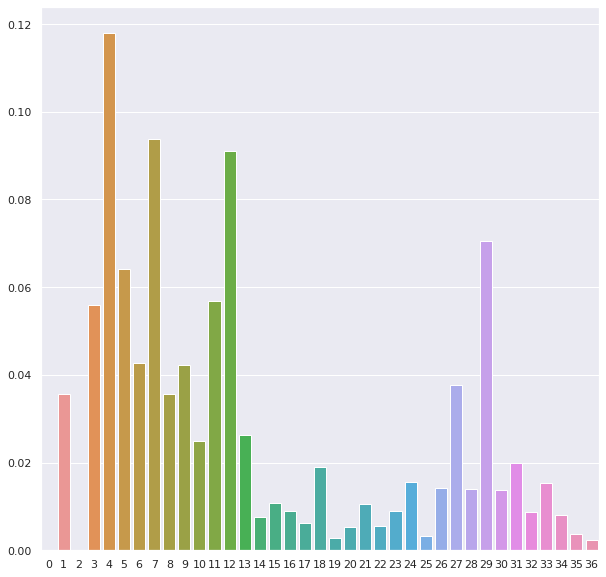

In [ ]:
importance = model5.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
sns.barplot([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
y_test_predict=model5.predict(X_test)
model_score=model5.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.9488054607508533
[[732   2]
 [ 43 102]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       734
           1       0.98      0.70      0.82       145

    accuracy                           0.95       879
   macro avg       0.96      0.85      0.89       879
weighted avg       0.95      0.95      0.95       879



In [ ]:
probs_train=model5.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc for train %.3f " % auc)

probs_test=model5.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc for test %.3f " % auc)

the auc for train 1.000 
the auc for test 0.949 


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [ ]:
g_search_RF = GridSearchCV(estimator = rf_model, param_grid = param_grid,

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
rf_tuned=g_search_RF.fit(X_train,y_train)

In [ ]:
y_train_predict=rf_tuned.predict(X_train)
model_score=rf_tuned.score(X_train, y_train)
print(model_score)
print('  ')
print(metrics.confusion_matrix(y_train,y_train_predict))
print('  ')

print(metrics.classification_report(y_train,y_train_predict))

0.9956118966357874
  
[[1723    0]
 [   9  319]]
  
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1723
           1       1.00      0.97      0.99       328

    accuracy                           1.00      2051
   macro avg       1.00      0.99      0.99      2051
weighted avg       1.00      1.00      1.00      2051



In [ ]:
y_test_predict=rf_tuned.predict(X_test)
model_score=rf_tuned.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.9328782707622298
[[728   6]
 [ 53  92]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       734
           1       0.94      0.63      0.76       145

    accuracy                           0.93       879
   macro avg       0.94      0.81      0.86       879
weighted avg       0.93      0.93      0.93       879



In [ ]:
probs_train=rf_tuned.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)

probs_test=rf_tuned.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

the auc 1.000 
the auc curve 0.943 


## Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bgcl = BaggingClassifier(n_estimators=100,random_state=1)

model6 = bgcl.fit(X_train, y_train)


In [ ]:
y_train_predict=model6.predict(X_train)
model_score=model6.score(X_train, y_train)
print(model_score)
print('  ')
print(metrics.confusion_matrix(y_train,y_train_predict))
print('  ')

print(metrics.classification_report(y_train,y_train_predict))

1.0
  
[[1723    0]
 [   0  328]]
  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1723
           1       1.00      1.00      1.00       328

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051



In [ ]:
y_test_predict=model6.predict(X_test)
model_score=model6.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.9397042093287827
[[720  14]
 [ 39 106]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       734
           1       0.88      0.73      0.80       145

    accuracy                           0.94       879
   macro avg       0.92      0.86      0.88       879
weighted avg       0.94      0.94      0.94       879



In [ ]:
probs_train=model6.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc for train %.3f " % auc)

probs_test=model6.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc for test %.3f " % auc)

the auc for train 1.000 
the auc for test 0.924 


Model Tuning for Bagging

In [ ]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(RandomForestClassifier(),
                                     n_estimators = 100, max_features = 0.5 ),
                   param_grid)
bc_tned= clf.fit(X_train, y_train)

In [ ]:
print(clf.best_params_)

{'base_estimator__max_depth': 5, 'max_samples': 0.5}


In [ ]:
y_train_predict=bc_tned.predict(X_train)
model_score=bc_tned.score(X_train, y_train)
print(model_score)
print('  ')
print(metrics.confusion_matrix(y_train,y_train_predict))
print('  ')

print(metrics.classification_report(y_train,y_train_predict))

0.8464163822525598
  
[[1723    0]
 [ 315   13]]
  
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1723
           1       1.00      0.04      0.08       328

    accuracy                           0.85      2051
   macro avg       0.92      0.52      0.50      2051
weighted avg       0.87      0.85      0.78      2051



In [ ]:
y_test_predict=bc_tned.predict(X_test)
model_score=bc_tned.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.8418657565415245
[[734   0]
 [139   6]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       734
           1       1.00      0.04      0.08       145

    accuracy                           0.84       879
   macro avg       0.92      0.52      0.50       879
weighted avg       0.87      0.84      0.78       879



In [ ]:
probs_train=bc_tned.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc for train %.3f " % auc)

probs_test=bc_tned.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc for test %.3f " % auc)

the auc for train 0.908 
the auc for test 0.815 


## ADA BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clfADB = AdaBoostClassifier(n_estimators=100)
model7=clfADB.fit(X_train,y_train)

In [ ]:
y_train_predict=model7.predict(X_train)
model_score=model7.score(X_train, y_train)
print(model_score)
print('  ')
print(metrics.confusion_matrix(y_train,y_train_predict))
print('  ')

print(metrics.classification_report(y_train,y_train_predict))

0.8888347147732814
  
[[1680   43]
 [ 185  143]]
  
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1723
           1       0.77      0.44      0.56       328

    accuracy                           0.89      2051
   macro avg       0.83      0.71      0.75      2051
weighted avg       0.88      0.89      0.88      2051



Feature: 0, Score: 0.00000
Feature: 1, Score: 0.01000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.02000
Feature: 4, Score: 0.26000
Feature: 5, Score: 0.10000
Feature: 6, Score: 0.01000
Feature: 7, Score: 0.07000
Feature: 8, Score: 0.03000
Feature: 9, Score: 0.03000
Feature: 10, Score: 0.01000
Feature: 11, Score: 0.05000
Feature: 12, Score: 0.18000
Feature: 13, Score: 0.01000
Feature: 14, Score: 0.01000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.01000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.02000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.01000
Feature: 25, Score: 0.02000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.01000
Feature: 28, Score: 0.01000
Feature: 29, Score: 0.03000
Feature: 30, Score: 0.02000
Feature: 31, Score: 0.03000
Feature: 32, Score: 0.02000
Feature: 33, Score: 0.01000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


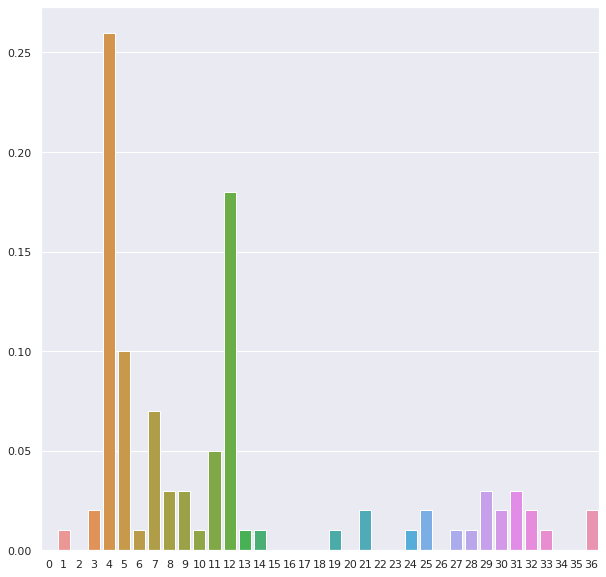

In [ ]:
importance = model7.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
sns.barplot([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
y_test_predict=model7.predict(X_test)
model_score=model7.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.8543799772468714
[[703  31]
 [ 97  48]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       734
           1       0.61      0.33      0.43       145

    accuracy                           0.85       879
   macro avg       0.74      0.64      0.67       879
weighted avg       0.83      0.85      0.84       879



In [ ]:
probs_train=model7.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc for train %.3f " % auc)

probs_test=model7.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc for test %.3f " % auc)

the auc for train 0.908 
the auc for test 0.808 


## Gradient Bossting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
model8 = gbcl.fit(X_train, y_train)

In [ ]:
y_train_predict=model8.predict(X_train)
model_score=model8.score(X_train, y_train)
print(model_score)
print('  ')
print(metrics.confusion_matrix(y_train,y_train_predict))
print('  ')

print(metrics.classification_report(y_train,y_train_predict))

0.9054119941491955
  
[[1707   16]
 [ 178  150]]
  
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1723
           1       0.90      0.46      0.61       328

    accuracy                           0.91      2051
   macro avg       0.90      0.72      0.78      2051
weighted avg       0.91      0.91      0.89      2051



Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00557
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.07347
Feature: 4, Score: 0.19189
Feature: 5, Score: 0.03684
Feature: 6, Score: 0.02232
Feature: 7, Score: 0.12224
Feature: 8, Score: 0.03245
Feature: 9, Score: 0.04570
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.04781
Feature: 12, Score: 0.04462
Feature: 13, Score: 0.03500
Feature: 14, Score: 0.00451
Feature: 15, Score: 0.00412
Feature: 16, Score: 0.00331
Feature: 17, Score: 0.00682
Feature: 18, Score: 0.00063
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00657
Feature: 21, Score: 0.01445
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00286
Feature: 24, Score: 0.01382
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00598
Feature: 27, Score: 0.08156
Feature: 28, Score: 0.00793
Feature: 29, Score: 0.16138
Feature: 30, Score: 0.00093
Feature: 31, Score: 0.00907
Feature: 32, Score: 0.00669
Feature: 33, Score: 0.00961
Feature: 34, Score: 0.00096
Feature: 35, Score: 0.00087
Fe

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


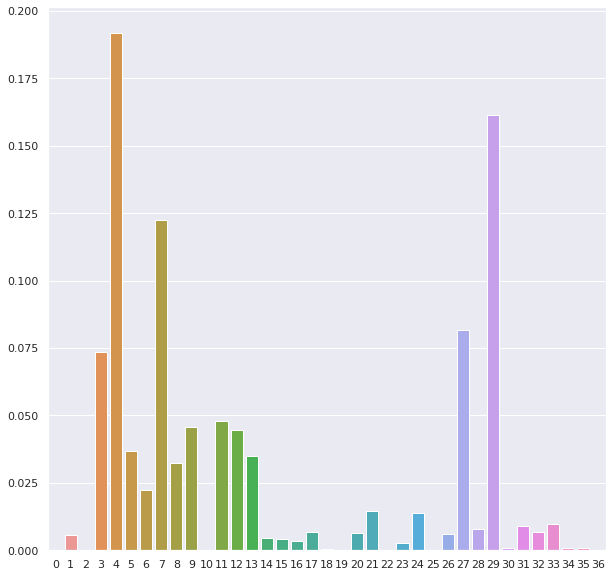

In [ ]:
importance = model8.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
sns.barplot([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
y_test_predict=model8.predict(X_test)
model_score=model8.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.8691695108077361
[[721  13]
 [102  43]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       734
           1       0.77      0.30      0.43       145

    accuracy                           0.87       879
   macro avg       0.82      0.64      0.68       879
weighted avg       0.86      0.87      0.84       879

